In [337]:
import numpy as np
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
import csv

In [338]:
with open ('C:\\Users\joe62\\OneDrive - Aberystwyth University\\Apps\\Desktop\\Research on demographic and health\\deep_learning_n.csv', 'r') as f:
      reader = csv.reader(f)
      deep_learning_n = list(reader)

In [339]:
  data = np.array(deep_learning_n, dtype=int)

In [340]:
Description of the data
The data is from Demographic and health survey, Nigeria dataset 2018. The dependent varaible (1st coloumn of the dataset) was to
determine if a child bearing woman ever had terminated pregnancy, "0" was no as reponse while "1" referrred to "yes" as response, 
indepedent variables were the weight of the respondent, wealth index, number of household and no of children given
birth to by the respondent in column 2 to 5 respectively.

SyntaxError: invalid decimal literal (1210782388.py, line 2)

In [341]:
print (data)

[[      0  870296  150234       6       3]
 [      0  870296  150234       6       3]
 [      0  870296  150234       6       3]
 ...
 [      0 1389845   39837       6       4]
 [      0 1389845   39837       6       4]
 [      1 1389845  106615       3       1]]


In [342]:
len(data)

104808

Spliting data into training and test data 

In [343]:
data = shuffle (data)

In [344]:
training, test = np.array_split(data, [int(0.8*len(data))])

In [345]:
len(training)

83846

In [346]:
print(training)

[[      0  952833  -98400       3      12]
 [      0 1053995 -124342       9       3]
 [      1  457847 -125428       6       4]
 ...
 [      0 1063614  147316       3       1]
 [      0  896160  129017      11       7]
 [      0  924613   61181       8       9]]


In [347]:
len(test)

20962

Preparing target (dependent variable)

In [348]:
dependent_train_data = training[0:,0]

In [349]:
print(dependent_train_data)

[0 0 1 ... 0 0 0]


Reshape train data

In [350]:
dependent_train_data= dependent_train_data.reshape(83846,1)

In [351]:
print(dependent_train_data)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [352]:
len(dependent_train_data)

83846

Preparing target (independent variable)

In [353]:
independent_variabls_train_data = training[:,1:]

In [354]:
print(independent_variabls_train_data)

[[ 952833  -98400       3      12]
 [1053995 -124342       9       3]
 [ 457847 -125428       6       4]
 ...
 [1063614  147316       3       1]
 [ 896160  129017      11       7]
 [ 924613   61181       8       9]]


In [355]:
len(independent_variabls_train_data)

83846

Reshape indepedent train data

In [356]:
independent_variabls_train_data = independent_variabls_train_data.reshape(83846,4)

In [357]:
print (independent_variabls_train_data )

[[ 952833  -98400       3      12]
 [1053995 -124342       9       3]
 [ 457847 -125428       6       4]
 ...
 [1063614  147316       3       1]
 [ 896160  129017      11       7]
 [ 924613   61181       8       9]]


Normalization of features (independent variables)

In [358]:
normalized_independent_train_samples = normalize(independent_variabls_train_data, axis=0)

In [359]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [360]:
print(normalized_independent_train_samples)

[[ 0.00314612 -0.00354673  0.00123706  0.00609075]
 [ 0.00348015 -0.00448179  0.00371118  0.00152269]
 [ 0.00151175 -0.00452093  0.00247412  0.00203025]
 ...
 [ 0.00351191  0.00530987  0.00123706  0.00050756]
 [ 0.002959    0.0046503   0.00453589  0.00355293]
 [ 0.00305294  0.00220521  0.00329883  0.00456806]]


Model

In [361]:
model = Sequential([
      
     Dense(units=32, input_shape=(4,), activation = "relu"),
     Dense(units=64, activation ="relu"),
     Dense(units=128, activation ="relu"),
     Dropout(0.5),
     Dense(units=1, activation = "sigmoid")
])

In [362]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                160       
                                                                 
 dense_52 (Dense)            (None, 64)                2112      
                                                                 
 dense_53 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________


Training the model

In [363]:
model.compile(optimizer = Adam (learning_rate = 0.01), loss = "binary_crossentropy", metrics = ["binary_accuracy"])

Model compile and ready for training with validation sample of 10%

In [364]:
model.fit(x=normalized_independent_train_samples, y = dependent_variabl_train_data , validation_split = 0.1, batch_size = 32, epochs = 5, verbose = 2)

Epoch 1/5
2359/2359 - 2s - loss: 0.4309 - binary_accuracy: 0.8474 - val_loss: 0.4257 - val_binary_accuracy: 0.8483 - 2s/epoch - 924us/step
Epoch 2/5
2359/2359 - 2s - loss: 0.4272 - binary_accuracy: 0.8476 - val_loss: 0.4261 - val_binary_accuracy: 0.8483 - 2s/epoch - 740us/step
Epoch 3/5
2359/2359 - 2s - loss: 0.4271 - binary_accuracy: 0.8476 - val_loss: 0.4257 - val_binary_accuracy: 0.8483 - 2s/epoch - 728us/step
Epoch 4/5
2359/2359 - 2s - loss: 0.4270 - binary_accuracy: 0.8476 - val_loss: 0.4257 - val_binary_accuracy: 0.8483 - 2s/epoch - 732us/step
Epoch 5/5
2359/2359 - 2s - loss: 0.4270 - binary_accuracy: 0.8476 - val_loss: 0.4258 - val_binary_accuracy: 0.8483 - 2s/epoch - 766us/step


Use model to predict

Preparing dependent_test_data

In [365]:
dependent_test_data = test[0:,0]

In [366]:
len(dependent_test_data)

20962

In [367]:
print(dependent_test_data)

[0 0 0 ... 0 0 0]


Preparing independent variables

In [368]:
independent_variabls_test_data = test[:,1:]

In [369]:
normalized_independent_test_samples = normalize(independent_variabls_test_data , axis=0)

In [370]:
print(normalized_independent_test_samples)

[[ 0.00639414 -0.00732152  0.00823635  0.00707854]
 [ 0.00625241 -0.00292207  0.00576544  0.00707854]
 [ 0.00500579 -0.00712356  0.00164727  0.00303366]
 ...
 [ 0.00702605  0.00706058  0.00329454  0.00202244]
 [ 0.00639414 -0.00523051  0.00823635  0.01011221]
 [ 0.00302446 -0.0048932   0.0214145   0.00808976]]


Predict

In [371]:
predictions = model.predict(x=independent_variabls_test_data, batch_size=10, verbose=0 )

In [372]:
len(predictions)

20962

In [373]:
rounded_predictions = np.argmax(predictions, axis=1)

In [374]:
print(rounded_predictions)

[0 0 0 ... 0 0 0]


In [375]:
rounded_predictions = rounded_predictions.reshape(20962, 1)

In [376]:
print(rounded_predictions)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [377]:
len(rounded_predictions)

20962

In [378]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [379]:
cm = confusion_matrix(y_true = dependent_test_data, y_pred = rounded_predictions )

In [380]:
print(cm)

[[17807     0]
 [ 3155     0]]


In [381]:
def plot_confusion_matrix(cm, classes, 
                          normalize= False, 
                          title = 'Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm=cm.astype('int')/ cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix' ),
    else:
            print('Confusion matrix, without normalization' )
    print(cm)
    
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment= "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17807     0]
 [ 3155     0]]


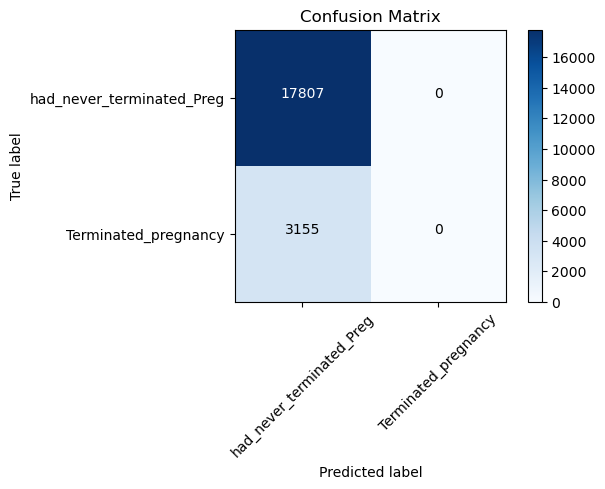

In [382]:
cm_plot_labels = ['had_never_terminated_Preg', 'Terminated_pregnancy'] 
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

Save the model

In [383]:
import os.path

In [385]:
os.chdir('C:\\Users\\joe62\OneDrive - Aberystwyth University\\Apps\Desktop')

In [386]:
if os.path.isfile('C:\\Users\\joe62\OneDrive - Aberystwyth University\\Apps\Desktop\\Deep learning') is False: 
    model.save('Deep learning(Sequential sequential model')

INFO:tensorflow:Assets written to: Deep learning(Sequential sequential model\assets


INFO:tensorflow:Assets written to: Deep learning(Sequential sequential model\assets
